<a href="https://colab.research.google.com/github/PIAIAU/photo_guide/blob/master/YOLO_imageV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
!nvidia-smi
#clone darknet repository 
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
# go to the darknet folder, enable GPU, then compile the entire thing
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

1# get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

!pwd
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

from google.colab import files
import cv2
import os.path
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from PIL import Image
import PIL.Image as pilimg
from sklearn.cluster import KMeans
import seaborn as sns

import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# uploaded = files.upload()
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Fri Feb 21 10:42:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|==============================

In [0]:
def readresultfile_o(result_file) :
  p = re.compile('-?\d{1,4}')
  df = pd.DataFrame(columns=['f_name', 'object1', 'a1','x1', 'y1', 'w1', 'h1'])
  file_name = ''
  idx = 0
  for i in result_file:
      try :
          if i.find('Enter') == 0:
              name_data = i.split(':')
              file_name = name_data[1]
              file_name = file_name.replace('data/test_data/', '')  # 파일 이름 가져오기
          else:
              jiwon = i.split(':')
              objects = jiwon[0]                          # 객체 이름 가져오기
              result = p.findall(i)
              tmp = []
              accuracy = result[0]
              x = result[1]
              y = result[2]
              w = result[3]
              h = result[4]
              tmp.append(file_name)
              tmp.append(objects)
              tmp.append(accuracy)
              tmp.append(x)
              tmp.append(y)
              tmp.append(w)
              tmp.append(h)
              df.loc[idx] = tmp
              idx += 1
      except :
          print('except sentence')
  return df
def readresultfile_p(result_file) :
  p = re.compile('-?\d{1,4}')
  df = pd.DataFrame(columns=['f_name', 'object2', 'a2','x2', 'y2', 'w2', 'h2'])
  file_name = ''
  idx = 0
  for i in result_file:
      try :
          if i.find('Enter') == 0:
              name_data = i.split(':')
              file_name = name_data[1]
              file_name = file_name.replace('data/test_data/', '')  # 파일 이름 가져오기
          else:
              jiwon = i.split(':')
              objects = jiwon[0]                          # 객체 이름 가져오기
              result = p.findall(i)
              tmp = []
              accuracy = result[0]
              x = result[1]
              y = result[2]
              w = result[3]
              h = result[4]
              tmp.append(file_name)
              tmp.append(objects)
              tmp.append(accuracy)
              tmp.append(x)
              tmp.append(y)
              tmp.append(w)
              tmp.append(h)
              df.loc[idx] = tmp
              idx += 1
      except :
          print('except sentence')
  return df
def angle_func(df):
  if df['angle']<0:
    return df['angle']+180
  else:
    return df['angle']


def modeling(model, test_df):
    prediction = model.predict(test_df)
    if prediction == 0 :
      img = cv2.imread(file_00)
      show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.subplot(131)
      plt.imshow(show_img1)
      img = cv2.imread(file_01)
      show_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      plt.subplot(132)
      plt.imshow(show_img2)
      img = cv2.imread(file_03)
      show_img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.subplot(133)
      plt.imshow(show_img3)
      plt.show()
    elif prediction == 1:
      img = cv2.imread(file_10)
      show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.subplot(131)
      plt.imshow(show_img1)
      img = cv2.imread(file_11)
      show_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      plt.subplot(132)
      plt.imshow(show_img2)
      img = cv2.imread(file_12)
      show_img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.subplot(133)
      plt.imshow(show_img3)
      plt.show()
    elif prediction == 2:
      img = cv2.imread(file_20)
      show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.subplot(131)
      plt.imshow(show_img1)
      img = cv2.imread(file_21)
      show_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      plt.subplot(132)
      plt.imshow(show_img2)
      img = cv2.imread(file_22)
      show_img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.subplot(133)
      plt.imshow(show_img3)
      plt.show()
    elif prediction == 3:
      img = cv2.imread(file_30)
      show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.imshow(show_img1)
      plt.show()

      img = cv2.imread(file_31)
      show_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      plt.imshow(show_img2)
      plt.show()
      img = cv2.imread(file_32)
      show_img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.imshow(show_img3)
      plt.show()
    elif prediction == 4:
      img = cv2.imread(file_40)
      show_img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.subplot(131)
      plt.imshow(show_img1)
      img = cv2.imread(file_41)
      show_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      plt.subplot(132)
      plt.imshow(show_img2)
      img = cv2.imread(file_42)
      show_img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.subplot(133)
      plt.imshow(show_img3)
      plt.show()
    

    print(test_df)
    print("predict :" + str(prediction))
def clustering(df, num, k, modelling, test_df):
    data_points = df.iloc[:,17:19].values
    test_data_point = test_df.iloc[:,17:19].values
    #kmeans = DBSCAN(eps=0.1, min_samples=5).fit(data_points)
    model = KMeans(n_clusters=k , random_state= 0)
    kmeans = model.fit(data_points)
    kmeans.labels_
    df['cluster_id'] = kmeans.labels_
    df.to_csv(str(num) + '_cluster_decision.csv', index=False)
    sns.lmplot(x='angle', y='prop', data=df, fit_reg = False,
           scatter_kws={"s":150},
           hue="cluster_id")
    plt.title(str(num) + '_kmeans plot')
    plt.show()
    if (modelling):
      modeling(model, test_data_point)


In [0]:
from google.colab import files
import cv2
import re
import os.path
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from PIL import Image
import PIL.Image as pilimg
from sklearn.cluster import KMeans
import seaborn as sns

import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

file_10 = './data_files/mc_01/00.jpg'
file_11 = './data_files/mc_01/01.jpg'
file_12 = './data_files/mc_01/02.jpg'
file_20 = './data_files/mc_02/00.jpg'
file_21 = './data_files/mc_02/01.jpg'
file_22 = './data_files/mc_02/02.jpg'

file_30 = './data_files/mc_03/00.jpg'
file_31 = './data_files/mc_03/01.jpg'
file_32 = './data_files/mc_03/02.jpg'
file_40 = './data_files/mc_04/00.jpg'
file_41 = './data_files/mc_04/01.jpg'
file_42 = './data_files/mc_04/02.jpg'

file_00 = './data_files/mc_00/00.jpg'
file_01 = './data_files/mc_00/01.jpg'
file_02 = './data_files/mc_00/02.jpg'


 CUDA-version: 10000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.5

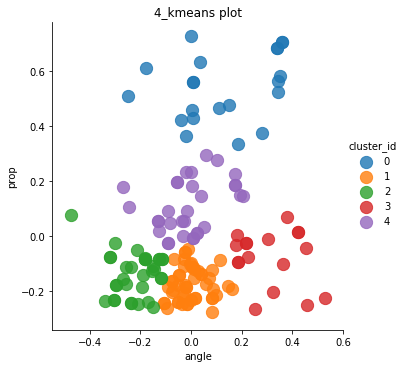

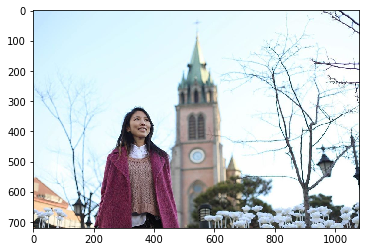

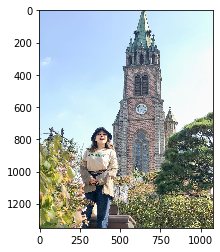

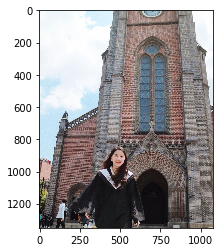

[[-0.22798022  0.32895188]]
predict :[3]


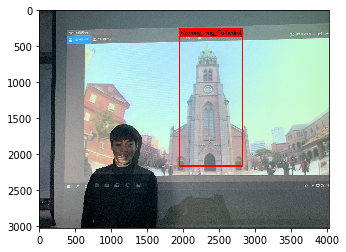

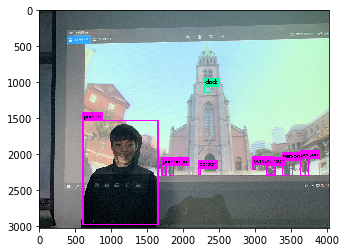

In [0]:
!./darknet detector test data_files/obj2.data data_files/yolo-obj2.cfg data_files/yolo-obj2_best.weights -dont_show -ext_output < data_files/test.txt > result.txt
file = './predictions.jpg'
img = cv2.imread(file)
show_imgo1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show -ext_output < data_files/test.txt > result2.txt
img = cv2.imread(file)
show_imgo2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
sorted_file = './data_files/'

# result.txt 를 csv로 처리
f1 = open('result.txt', 'r', encoding='UTF-8')
readresultfile_o(f1).to_csv('txt2csv_result1.csv')
f2 = open('result2.txt', 'r', encoding='UTF-8')
readresultfile_p(f2).to_csv('txt2csv_result2.csv')


# csv파일을 merge하고 정렬

txt2csv_data1 = pd.read_csv("./txt2csv_result1.csv")
txt2csv_data2 = pd.read_csv("./txt2csv_result2.csv")
txt2csv_data2['s2'] = txt2csv_data2['w2']*txt2csv_data2['h2']
sorted_data2 = txt2csv_data2.loc[txt2csv_data2["object2"]=='person']
func1 = lambda max_df: max_df.sort_values("s1",ascending=False).iloc[0]
func2 = lambda max_df: max_df.sort_values("s2",ascending=False).iloc[0]
sorted_data2 = sorted_data2.groupby('f_name').agg(func2)
txt2csv_data1['s1'] = txt2csv_data1['w1']*txt2csv_data1['h1']
sorted_data1 = txt2csv_data1.groupby('f_name').agg(func1)
sorted_inner_data=pd.merge(sorted_data1,sorted_data2,how="inner",left_index=True, right_index=True)
sorted_inner_data.to_csv("./sorted_inner_data.csv")
%matplotlib inline

#결과 csv 파일 읽기
df = pd.read_csv('./sorted_inner_data.csv')
df.head()

#거리, 각 column 추가
a = df['x1']+df['w1']/2
b = df['y1']+df['h1']/2
c = df['x2']+df['w2']/2
d = df['y2']+df['h2']/2

df['prop'] = df['s1']/df['s2']
df['angle']= np.degrees(np.arctan((b-d)/(a-c)))

df['angle'] = df.apply(angle_func, axis=1)
df_lottetower = df[df['object1']=='Myeongdong_Cathedral']

df1 = pd.read_csv('./data_files/myeongdong_cathedral.csv')
df_lottetower.to_csv('./result_dataframe.csv')

df_lottetower['prop'] = (df_lottetower['prop']-df1['prop'].mean())/(df1['prop'].max()-df1['prop'].min())
df_lottetower['angle'] = (df_lottetower['angle']-df1['angle'].mean())/(df1['angle'].max()-df1['angle'].min())
df_lottetower.to_csv('./df_lottetower.csv')
df1['prop'] = (df1['prop']-df1['prop'].mean())/(df1['prop'].max()-df1['prop'].min())
df1['angle'] = (df1['angle']-df1['angle'].mean())/(df1['angle'].max()-df1['angle'].min())

clustering(df1,4,5, True, df_lottetower)

plt.imshow(show_imgo1)
plt.show()
plt.imshow(show_imgo2)
plt.show()
